<h3>Random walk with drift</h3>

Use a biased coin to simulate a random
walk of 30 steps on the line. If the coin falls heads (H), take one step to
the right, if it lands tails (T ), take one step left. After 30 steps, note the
final position. Take Pr(H)=0.6 and Pr(T )=0.4. 

(a) Plot a sample path.


(b) Make a histogram for 200 such random walks. 

(c) Report the sample
mean. 

(d) Report the sample variance. (What should these be exactly?)

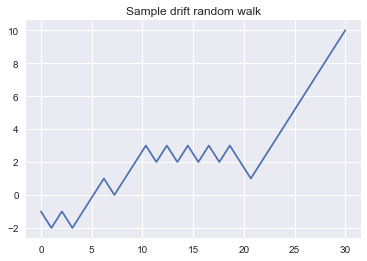

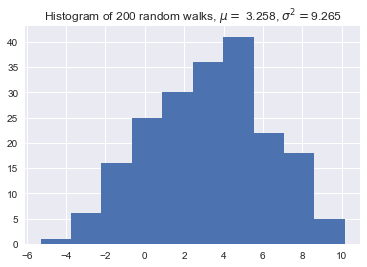

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def drift_random_walk():
    path = []
    starting_pos = 0
    for i in range(30):
        if np.random.uniform() < 0.6: starting_pos += 1
        else: starting_pos -= 1
        path.append(starting_pos)
    return path
    
x = np.linspace(0,30,30)
plt.title("Sample drift random walk")
plt.plot(x,drift_random_walk())
plt.show()

samples = [np.mean(drift_random_walk()) for i in range(200)]
sample_mean = round(np.mean(samples),3)
sample_var = round(np.var(samples),3)

plt.title(f"Histogram of 200 random walks, $\mu =$ {sample_mean}, $\sigma^2=${sample_var}")    
plt.hist(samples, bins=10)
plt.show()

<h3>Gambler’s ruin with time limits</h3>

Modify the simulation code in Section 1.1.3 starting on page 8 for the gambler’s ruin problem, but with
various upper bounds on the iteration count. How does this bias the average duration of the game? How does this bias the sample variance?

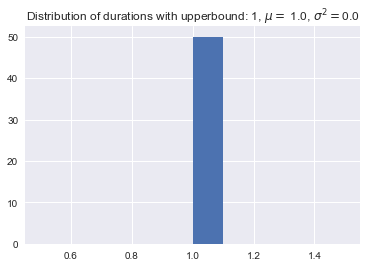

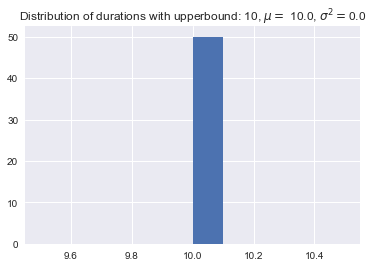

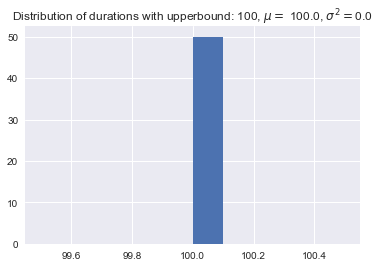

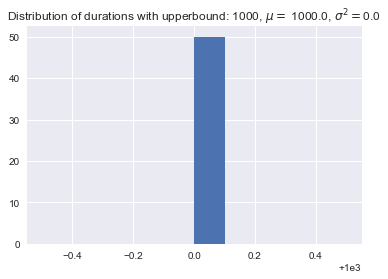

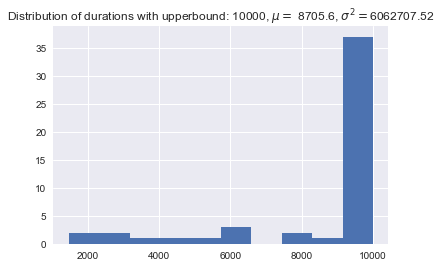

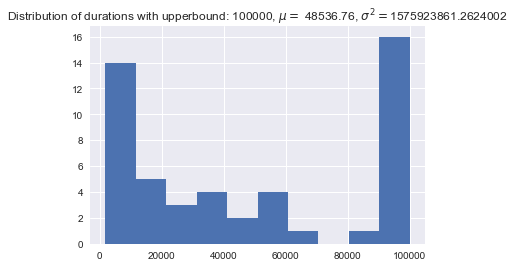

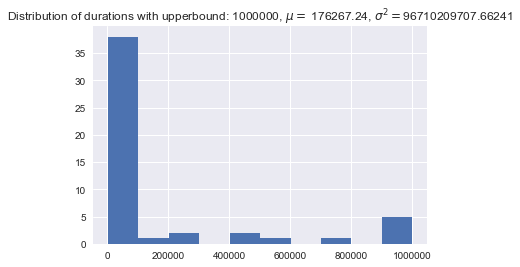

In [88]:
def gamblers_ruin(upperbound):
    
    winnings = [100] # gambler’s initial fortune
    
    i = 0
    prev_win = winnings[i]
    
    while prev_win>0 and prev_win<2100 and i < upperbound: 
        
        w = np.random.choice((-1,1)) #random value of +/-1
        winnings.append(prev_win + w) #add new winnings
        i += 1
        prev_win = winnings[i]

    return i


upperbounds = [10**x for x in range(7)]
for i in upperbounds:
    sample_durations = []
    for n in range(50):
        sample_durations.append(gamblers_ruin(i))
    mean = np.mean(sample_durations)
    var = np.var(sample_durations)
    plt.title(f"Distribution of durations with upperbound: {i}, $\mu =$ {mean}, $\sigma^2=${var}")
    plt.hist(sample_durations)
    plt.show()
    


